
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/Banner_IA2_1.png" style="width:1500px;heigth:100px">

### **2170688 - Brayan Rodolfo Barajas Ochoa**

# **3. Solve a image classification problem with CNN's** (40 %)

As you have observed CNN architectures are the state-of-the-art to solve classification image problems. Also, in web there exist a lot of datasets to test our nets. So,

- Select one dataset with images and related with a classification problem. The dataset selected shoud be different to the other students. Please see the list [Here](https://docs.google.com/spreadsheets/d/1IkDVr9eOSispScnJrLDb3k_shdivXDzjrJ1Cr77Yjq8/edit?usp=sharing). Note that there exist other datasets forbidden. 
- Propose a CNN architecture to solve such problem
- Also implement some configuration from a pre-trained net, using transfer learning. 

- **Please dont use CIFAR,  MNIST, or any version of MNIST, such as fashion mnist**

- **REMARK CONCLUSIONS. Report all results and discuss about findings**


## Cargar los datos

Se importan librerías y se carga el token para la API de kaggle

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"brayanbarajas","key":"641b5957036d7246fa746f789f950053"}'}

In [ ]:
!ls -lha kaggle.json
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle
# This permissions change avoids a warning on Kaggle tool startup
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 69 Dec 20 18:54 kaggle.json


In [ ]:
#install in case it's not installed
#!pip install -q kaggle
!kaggle datasets download -d alexattia/the-simpsons-characters-dataset
!unzip the-simpsons-characters-dataset.zip -d /content/Data # cambiar el nombre de archivo .zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: /content/Data/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1270.jpg  
  inflating: /content/Data/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1271.jpg  
  inflating: /content/Data/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1272.jpg  
  inflating: /content/Data/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1273.jpg  
  inflating: /content/Data/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1274.jpg  
  inflating: /content/Data/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1275.jpg  
  inflating: /content/Data/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1276.jpg  
  inflating: /content/Data/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1277.jpg  
  inflating: /content/Data/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1278.jpg  
  inflating: /content/Data/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1279.jpg  
  inflating: /content/Data/simpsons_dataset/simpsons_datase

In [ ]:
import os
os.chdir("Data")
!rm -r simpsons_dataset/simpsons_dataset/ #Eliminar una carpeta repetida

Debido a la disparidad entre las diferentes clases que existen, solamente se seleccionarán aquellas que tengan suficiente cantidad de datos, el resto de carpetas se borrarán.

In [ ]:
import shutil
path="simpsons_dataset/"
classes=os.listdir(path)
class_sizes=[len(os.listdir("simpsons_dataset/"+c)) for c in classes]
p_classes = [c for _,c in sorted(zip(class_sizes,classes))]
p_classesg=p_classes[int(len(classes)/2)+1:]

for i in p_classes[0:int(len(classes)/2)+1]:
  shutil.rmtree(path+i)


Como no se cuenta con una gran cantidad de datos, se utiliza el data augmentation, que a su vez permite dividir los datos para train y test.

In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
    featurewise_center=False,  
            samplewise_center=False, 
            featurewise_std_normalization=False, 
            samplewise_std_normalization=False, 
            zca_whitening=False, 
            rotation_range=10,  
            width_shift_range=0.1, 
            height_shift_range=0.1,
            horizontal_flip=True,
            vertical_flip=False,
    validation_split=0.2) # set validation split

train_generator = datagen.flow_from_directory(
    path,
    target_size=(64 , 64),
    batch_size= 32,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = datagen.flow_from_directory(
    path, # same directory as training data
    target_size=(64, 64),
    batch_size= 32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 15648 images belonging to 20 classes.
Found 3900 images belonging to 20 classes.


## Creación de CNN

Como ya se mencionó anteriormente, se cuenta con relativamente pocas imágenes (aproximadamente 20000), con lo cual es conveniente no utilizar tantas capas para evitar el desvanecimiento del gradiente. Se crea una red con 6 capas convolucionales, una densa y la de clasificación.

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=(64, 64, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(32, (3, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(64, (3, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same')) 
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(256, (3, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(20, activation='softmax'))
opt = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 31, 31, 64)       

Epoch 1/20
489/489 [==============================] - 581s 1s/step - loss: 2.7727 - accuracy: 0.1449 - val_loss: 2.2246 - val_accuracy: 0.3410
Epoch 2/20
489/489 [==============================] - 575s 1s/step - loss: 1.9772 - accuracy: 0.4005 - val_loss: 1.7695 - val_accuracy: 0.4808
Epoch 3/20
489/489 [==============================] - 580s 1s/step - loss: 1.4928 - accuracy: 0.5514 - val_loss: 1.2537 - val_accuracy: 0.6290
Epoch 4/20
489/489 [==============================] - 575s 1s/step - loss: 1.1062 - accuracy: 0.6653 - val_loss: 1.0318 - val_accuracy: 0.6936
Epoch 5/20
489/489 [==============================] - 585s 1s/step - loss: 0.8978 - accuracy: 0.7237 - val_loss: 0.8868 - val_accuracy: 0.7495
Epoch 6/20
489/489 [==============================] - 588s 1s/step - loss: 0.7599 - accuracy: 0.7739 - val_loss: 0.8451 - val_accuracy: 0.7428
Epoch 7/20
489/489 [==============================] - 579s 1s/step - loss: 0.6723 - accuracy: 0.7959 - val_loss: 0.8023 - val_accuracy: 0.7823

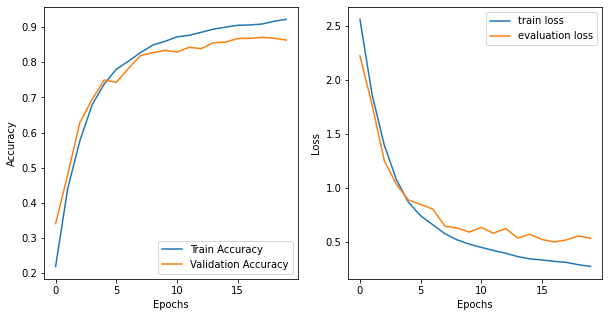

In [ ]:
history = model.fit(train_generator, epochs=20,verbose=1, batch_size=32,validation_data=validation_generator)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

### Conclusiones
- Se puede observar que la CNN creada obtuvo excelentes resultados, con un validation accuracy mayor al 85%.
- Al tener pocas capas, la red pudo obtener las características que permiten hacer una clasificación efectiva, sin que haya ocurrido desvanecimiento del gradiente en el proceso de training.
- El data augmentation ayudó a mejorar el conjunto de entrenamiento.

## Transfer Learning

Luego de probar con diferentes redes preentrenadas, el mejor resultado obtenido fue con la Xception, que es presentada a continuación.

Antes de esto, es necesario realizar un ajuste al conjunto de datos debido a que esta red requiere de un tamaño de imagen de 71 x 71.

In [ ]:
#Es necesario cambiar el target size debido a que el mínimo que acepta la red Xception, que es la que se utilizará, es de 71x71
train_generator = datagen.flow_from_directory(
    path,
    target_size=(71 , 71),
    batch_size= 32,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = datagen.flow_from_directory(
    path, # same directory as training data
    target_size=(71, 71),
    batch_size= 32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 15648 images belonging to 20 classes.
Found 3900 images belonging to 20 classes.


Se carga la red preentrenada Xception

In [ ]:
Xcep=  tf.keras.applications.Xception(input_shape=(71, 71, 3), weights='imagenet', include_top=False)
Xcep.trainable = False
Xcep.summary()

83689472/83683744 [==============================] - 0s 0us/step
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 71, 71, 3)]  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 35, 35, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 35, 35, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 35, 35, 32)   0           block1_conv1_bn[0][0]            
__________________________

Se agrega la última capa para la clasificación de acuerdo a las 20 clases que se tienen

In [ ]:
prediction_layer = tf.keras.layers.Dense(20, activation='softmax')
flatten_layer = tf.keras.layers.Flatten()
model_xcep = tf.keras.Sequential([
  Xcep,
  flatten_layer,
  prediction_layer
])
model_xcep.summary()
print("number of layers to train: ", len(model_xcep.trainable_variables))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 3, 3, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 20)                368660    
Total params: 21,230,140
Trainable params: 368,660
Non-trainable params: 20,861,480
_________________________________________________________________
number of layers to train:  2


Se hace el entrenamiento del último segmento de la red, que corresponde únicamente a la clasificación final.

Epoch 1/60
489/489 [==============================] - 90s 165ms/step - loss: 265.3355 - accuracy: 0.2179 - val_loss: 237.5298 - val_accuracy: 0.2818
Epoch 2/60
489/489 [==============================] - 79s 162ms/step - loss: 219.5159 - accuracy: 0.3521 - val_loss: 260.2808 - val_accuracy: 0.3121
Epoch 3/60
489/489 [==============================] - 80s 163ms/step - loss: 223.3130 - accuracy: 0.3718 - val_loss: 294.8716 - val_accuracy: 0.3133
Epoch 4/60
489/489 [==============================] - 79s 161ms/step - loss: 232.2022 - accuracy: 0.3928 - val_loss: 272.6973 - val_accuracy: 0.3405
Epoch 5/60
489/489 [==============================] - 80s 163ms/step - loss: 222.2529 - accuracy: 0.4153 - val_loss: 286.0750 - val_accuracy: 0.3626
Epoch 6/60
489/489 [==============================] - 80s 163ms/step - loss: 223.6725 - accuracy: 0.4268 - val_loss: 283.8738 - val_accuracy: 0.3546
Epoch 7/60
489/489 [==============================] - 80s 163ms/step - loss: 229.2897 - accuracy: 0.4199 -

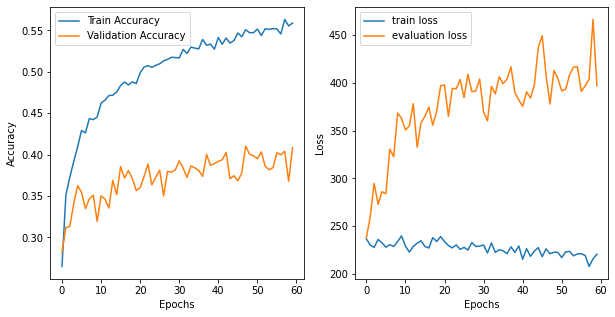

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model_xcep.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])
history = model_xcep.fit(train_generator, epochs=60,verbose=1, batch_size=32,validation_data=validation_generator)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

Se puede observar que los resultados no fueron muy buenos, por lo que se tratará de mejorarlo por medio de fine tunning, descongelando poco a poco capas y disminuyendo el learning rate.

In [ ]:
Xcep.trainable = True
print("Total ayers of Xception: ", len(Xcep.layers))
for layer in Xcep.layers[:100]: # Se dejan sin entrenar las primeras 100 capas
  layer.trainable =  False
print("Total ayers of Xception: ", len(Xcep.layers))
model_xcep.summary(
)

Total ayers of Xception:  132
Total ayers of Xception:  132
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 3, 3, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 20)                368660    
Total params: 21,230,140
Trainable params: 9,847,004
Non-trainable params: 11,383,136
_________________________________________________________________


Epoch 1/30
489/489 [==============================] - 83s 164ms/step - loss: 102.4334 - accuracy: 0.1123 - val_loss: 1988.0662 - val_accuracy: 0.0972
Epoch 2/30
489/489 [==============================] - 80s 164ms/step - loss: 34.2793 - accuracy: 0.1125 - val_loss: 3457.4182 - val_accuracy: 0.0997
Epoch 3/30
489/489 [==============================] - 79s 161ms/step - loss: 24.8364 - accuracy: 0.1119 - val_loss: 499.7880 - val_accuracy: 0.1115
Epoch 4/30
489/489 [==============================] - 79s 162ms/step - loss: 18.0038 - accuracy: 0.1132 - val_loss: 304.5161 - val_accuracy: 0.1138
Epoch 5/30
489/489 [==============================] - 79s 161ms/step - loss: 17.0913 - accuracy: 0.1171 - val_loss: 104.2338 - val_accuracy: 0.1136
Epoch 6/30
489/489 [==============================] - 79s 161ms/step - loss: 14.2098 - accuracy: 0.1132 - val_loss: 332.6750 - val_accuracy: 0.1121
Epoch 7/30
489/489 [==============================] - 78s 160ms/step - loss: 14.2912 - accuracy: 0.1115 - val

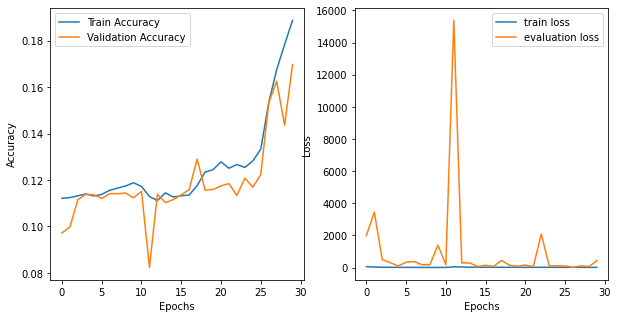

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1/10) #Se disminuye el learning rate
model_xcep.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])
history = model_xcep.fit(train_generator, epochs=30,verbose=1, batch_size=32,validation_data=validation_generator)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

Total ayers of Xception:  132
Total ayers of Xception:  132
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 3, 3, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 20)                368660    
Total params: 21,230,140
Trainable params: 16,302,908
Non-trainable params: 4,927,232
_________________________________________________________________
Epoch 1/60
489/489 [==============================] - 80s 158ms/step - loss: 12.4687 - accuracy: 0.1604 - val_loss: 517.8262 - val_accuracy: 0.1449
Epoch 2/60
489/489 [==============================] - 76s 156ms/step - loss: 5.8317 - accuracy: 0.1867 - val_loss: 543.9339 - val_accuracy: 0.1854
Epoch 3/60


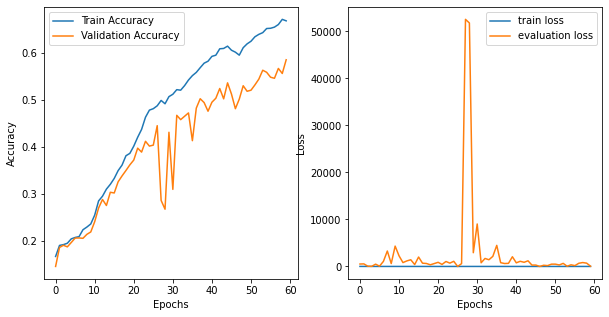

In [ ]:
Xcep.trainable = True
print("Total ayers of Xception: ", len(Xcep.layers))
for layer in Xcep.layers[:60]: #SE dejan sin entrenar las primeras 60 capas
  layer.trainable =  False
print("Total ayers of Xception: ", len(Xcep.layers))
model_xcep.summary(
)

opt = tf.keras.optimizers.Adam(learning_rate=0.1/100) #Se disminuye el learning rate
model_xcep.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])
history = model_xcep.fit(train_generator, epochs=60,verbose=1, batch_size=32,validation_data=validation_generator)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

Total ayers of Xception:  132
Total ayers of Xception:  132
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 3, 3, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 20)                368660    
Total params: 21,230,140
Trainable params: 20,794,668
Non-trainable params: 435,472
_________________________________________________________________
Epoch 1/20
489/489 [==============================] - 82s 161ms/step - loss: 1.8919 - accuracy: 0.6399 - val_loss: 89.0263 - val_accuracy: 0.5756
Epoch 2/20
489/489 [==============================] - 78s 160ms/step - loss: 1.4149 - accuracy: 0.6689 - val_loss: 423.0268 - val_accuracy: 0.5544
Epoch 3/20
489/

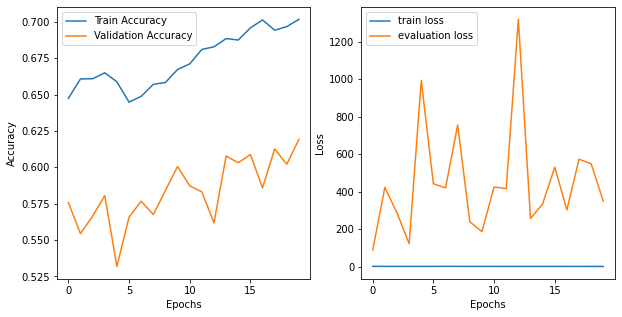

In [ ]:
Xcep.trainable = True
print("Total ayers of Xception: ", len(Xcep.layers))
for layer in Xcep.layers[:30]: #Se dejan sin entrenar las primeras 30 capas
  layer.trainable =  False
print("Total ayers of Xception: ", len(Xcep.layers))
model_xcep.summary(
)

opt = tf.keras.optimizers.Adam(learning_rate=0.1/1000) #Se disminuye el learning rate
model_xcep.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])
history = model_xcep.fit(train_generator, epochs=20,verbose=1, batch_size=32,validation_data=validation_generator)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

### Conclusiones
- Al realizar transfer learning, se obtuvo 70% de accuracy en el training y 62% en el validation, lo que desmejora lo realizado previamente.
- Los resultados obtenidos por medio de transfer learning no fueron los deseados, al menos al compararlos con los obtenidos por la red creada desde cero. Esto puede deberse principalmente a dos razones: la primera es que las redes preentrenadas presentan gran cantidad de capas por lo que, con la cantidad de imágenes que se tienen, es posible que haya ocurrido desvanecimiento del gradiente en algún punto; la otra es que el conjunto de imágenes está basado en dibujos animados, lo cual tiene poca relación con el conjunto de datos para el cual fue entrenada la red utilizada.
- Los resultados obtenidos muestran que realizar transfer learning no garantiza la obtención de mejores resultados, ya que esto depende en gran parte del conjunto de datos que se tengan y sus características.


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/bannerThanks.jpg" style="width:1000px;">